In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data = pd.read_csv('./data.csv',index_col=False)
scaler = StandardScaler()
scaler.fit(data)
scaled_df = pd.DataFrame(scaler.transform(data), columns=data.columns)
print(scaled_df.head(5))

   Education  Marital_Status    Income   Recency  Complain       Age  \
0  -0.158187        1.349603  0.287105  0.310353  -0.09552  1.018352   
1  -0.158187        1.349603 -0.260882 -0.380813  -0.09552  1.274785   
2  -0.158187       -0.740959  0.913196 -0.795514  -0.09552  0.334530   
3  -0.158187       -0.740959 -1.176114 -0.795514  -0.09552 -1.289547   
4  -0.158187       -0.740959  0.294307  1.554453  -0.09552 -1.033114   

   Engaged_Days      Kids  Expenses  TotalAcceptedCampaign  NumTotalPurchases  
0      1.973583 -1.264598  1.676245               0.617244           1.317945  
1     -1.665144  1.404572 -0.963297              -0.502808          -1.159273  
2     -0.172664 -1.264598  0.280110              -0.502808           0.796425  
3     -1.923210  0.069987 -0.920135              -0.502808          -0.898513  
4     -0.822130  0.069987 -0.307562              -0.502808           0.535666  


In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# X, y = data.iloc[:,4:],df.iloc[:,0]
#linear regression:y=ax+b
#https://xgboost.readthedocs.io/en/stable/
X,y = scaled_df[["Education","Marital_Status","Income","Recency","Complain","Age",
            "Engaged_Days","Kids","TotalAcceptedCampaign","NumTotalPurchases"]],scaled_df[["Expenses"]]
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Expenses  2212 non-null   float64
dtypes: float64(1)
memory usage: 17.4 KB
None


In [5]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 200)#train 200 times 
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

RMSE: 0.368855


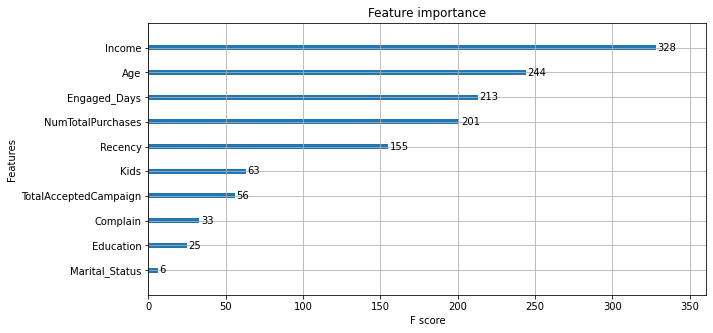

In [6]:
print("RMSE: %f" % (rmse))
plt.rcParams['figure.figsize'] = [10, 5]
xgb.plot_importance(xg_reg)
plt.show()

Model Performance

Text(0, 0.5, 'expenses')

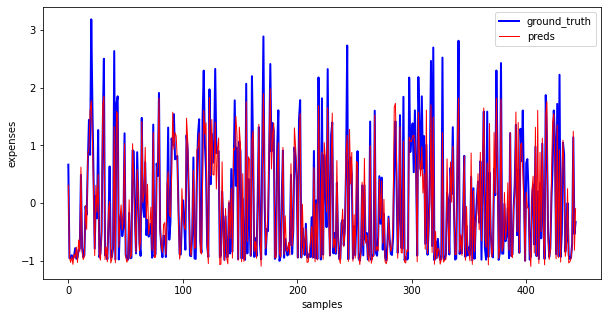

In [8]:
x = np.linspace(0,len(preds),len(preds))
plt.plot(x,y_test,color='blue',linewidth="2" )
plt.plot(x,preds,color='red',linewidth="1" )
plt.legend(["ground_truth","preds"])
plt.xlabel("samples")
plt.ylabel("expenses")

Model Loss

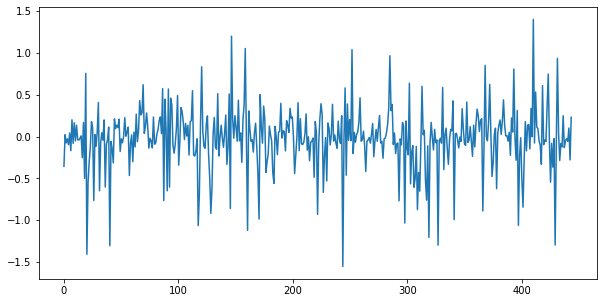

In [9]:
plt.plot(x,preds-y_test["Expenses"])